### Histograms, Binnings, and Density

• A simple histogram can be a great first step in understanding a dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)

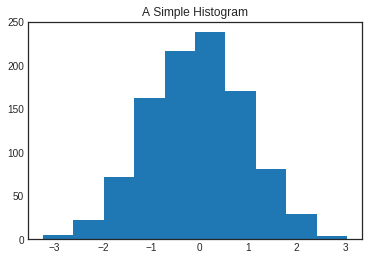

In [2]:
plt.title('A Simple Histogram')
plt.hist(data);

• The hist() function has many options to tune both the calculation and the display.

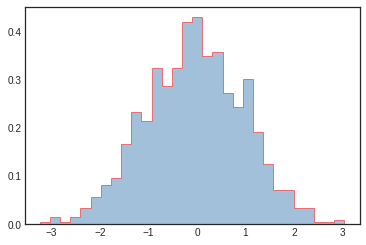

In [3]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='red');

• The plt.hist docstring has more information on other customization options available.

• I find this combination of histtype='stepfilled' along with some transparency alpha to be very useful when comparing histograms of several distributions.

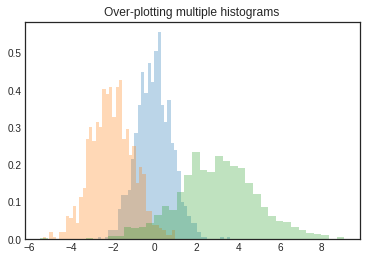

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype = 'stepfilled', alpha = 0.3, density = True, bins = 40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.title('Over-plotting multiple histograms');

• If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the np.histogram() function is available

In [5]:
counts, bin_edges = np.histogram(data, bins = 5)
counts

array([ 27, 234, 454, 252,  33])

### Two-Dimensional Histograms and Binnings

• Just as we create histograms in one dimension by dividing the number line into bins, we can also create histograms in two dimensions by dividing points among two-dimensional bins.

• We’ll take a brief look at several ways to do this here.

• We’ll start by defining some data—an x and y array drawn from a multivariate Gaussian distribution.

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

### plt.hist2d: Two-dimensional histogram

• One straightforward way to plot a two-dimensional histogram is to use Matplotlib’s plt.hist2d function.

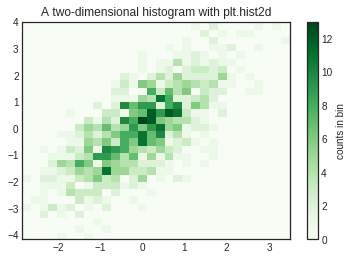

In [19]:
plt.hist2d(x, y, bins=30, cmap='Greens')
plt.colorbar().set_label('counts in bin')
plt.title('A two-dimensional histogram with plt.hist2d');

• Just as with plt.hist , plt.hist2d has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.

• Further, just as plt.hist has a counterpart in np.histogram , plt.hist2d has a counterpart in np.histogram2d.

In [25]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### plt.hexbin: Hexagonal binnings

• The two-dimensional histogram creates a tessellation of squares across the axes.

• Another natural shape for such a tessellation is the regular hexagon.

• For this purpose, Matplotlib provides the plt.hexbin routine, which represents a two-dimensional dataset binned within a grid of hexagons.

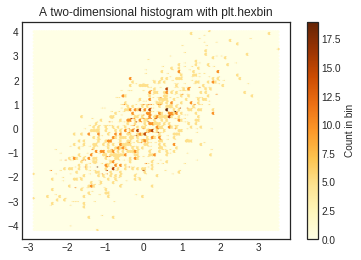

In [28]:
plt.hexbin(x, y, bins=20, cmap='YlOrBr')
plt.colorbar(label = 'Count in bin')
plt.title('A two-dimensional histogram with plt.hexbin');

### Kernel density estimation

• Another common method of evaluating densities in multiple dimensions is kernel density estimation (KDE).

• One extremely quick and simple KDE implementation exists in the scipy.stats package.

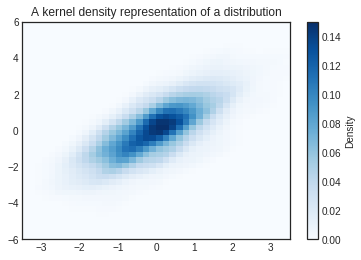

In [32]:
from scipy.stats import gaussian_kde

# Fit an array of size [Ndim, NSamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# Evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
plt.colorbar(label = 'Density')
plt.title('A kernel density representation of a distribution');